In [ ]:
!pip install torch==2.0.1 torchaudio==2.0.2+cu117 --index-url https://download.pytorch.org/whl/cu117 --no-cache-dir
!pip install numpy==1.24.4 --no-cache-dir
!pip install matplotlib
!pip install librosa
!pip install git+https://github.com/suno-ai/bark.git

In [ ]:
import numpy as np
np.complex = complex
np.float = float
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import time

from bark import SAMPLE_RATE, generate_audio, preload_models

In [ ]:
#preload Bark
preload_models()

###Synthesizing with Male Voice

In [38]:
text_prompt = """
    Welcome to the speech synthesis demo.
"""
audio_array = generate_audio(text_prompt, history_prompt="v2/en_speaker_2") #male speaker
Audio(audio_array, rate=SAMPLE_RATE)

100%|██████████| 12/12 [00:10<00:00,  1.18it/s]


###Synthesizing with Female Voice

In [29]:
text_prompt = """
    Welcome to the speech synthesis demo.
"""
audio_array = generate_audio(text_prompt, history_prompt="v2/en_speaker_9") #female speaker
Audio(audio_array, rate=SAMPLE_RATE)

100%|██████████| 9/9 [00:07<00:00,  1.16it/s]


###Comparing Male and Female voices (Plots)

In [ ]:
male_speaker   = "v2/en_speaker_2"
female_speaker = "v2/en_speaker_9"

audio_male   = generate_audio(text_prompt, history_prompt=male_speaker)
audio_female = generate_audio(text_prompt, history_prompt=female_speaker)

100%|██████████| 9/9 [00:07<00:00,  1.16it/s]


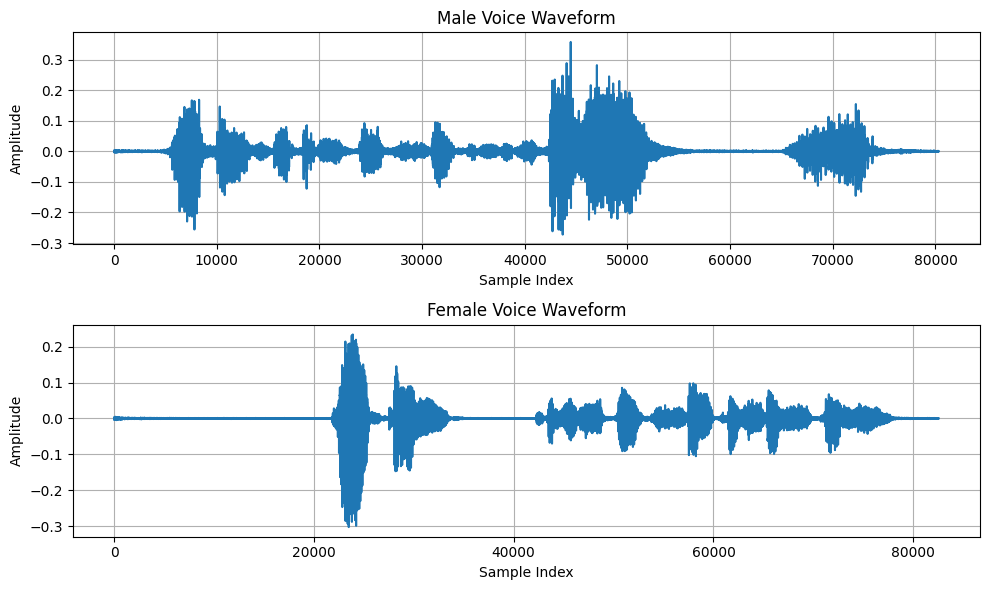

In [ ]:
#Waveform
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(audio_male)
plt.title("Male Voice Waveform")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(audio_female)
plt.title("Female Voice Waveform")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

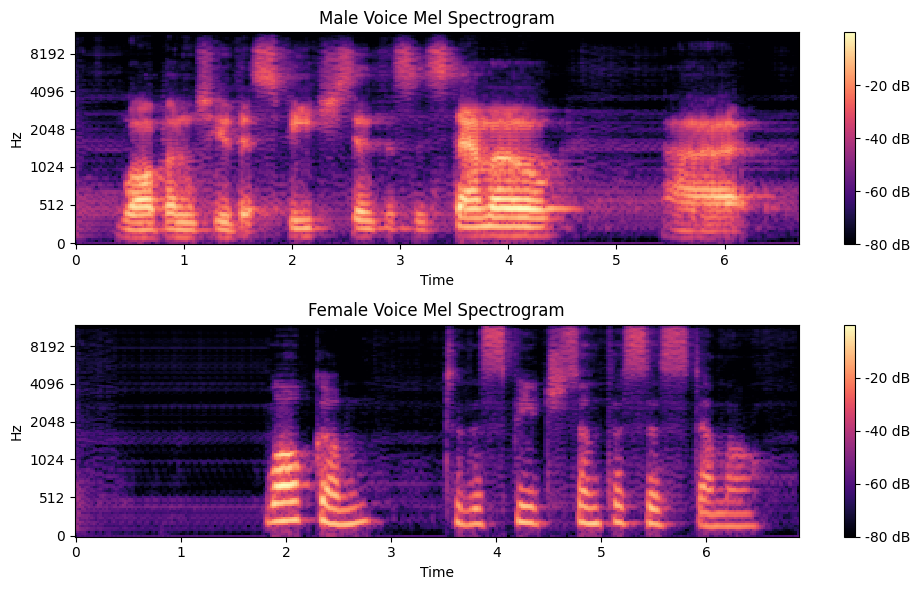

In [ ]:
#Mel-spectrogram

#spectrograms
S_male   = librosa.feature.melspectrogram(y=audio_male, sr=SAMPLE_RATE, n_fft=1024, hop_length=256)
S_female = librosa.feature.melspectrogram(y=audio_female, sr=SAMPLE_RATE, n_fft=1024, hop_length=256)
S_male_dB   = librosa.power_to_db(S_male, ref=np.max)
S_female_dB = librosa.power_to_db(S_female, ref=np.max)

#Plot
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(S_male_dB, sr=SAMPLE_RATE, x_axis='time', y_axis='mel')
plt.title("Male Voice Mel Spectrogram")
plt.colorbar(format='%+2.0f dB')

plt.subplot(2, 1, 2)
librosa.display.specshow(S_female_dB, sr=SAMPLE_RATE, x_axis='time', y_axis='mel')
plt.title("Female Voice Mel Spectrogram")
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

###Latency Evaluation

In [ ]:
#Sample prompts
texts = {
    "Short": "Hello!",
    "Medium": "This is a medium-length sentence for Bark synthesis.",
    "Long": "Bark is an advanced text-to-audio model that generates human-like speech using semantic and acoustic tokens. It can even replicate emotions.",
}

latencies = {}

#Generation time
for label, text in texts.items():
    start = time.time()
    _ = generate_audio(text, history_prompt="v2/en_speaker_2")
    end = time.time()
    latencies[label] = end - start


100%|██████████| 28/28 [00:18<00:00,  1.51it/s]


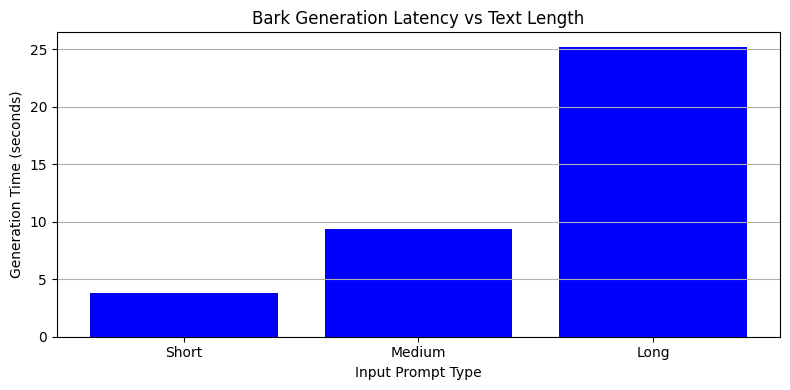

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(latencies.keys(), latencies.values(), color='blue')
plt.title("Bark Generation Latency vs Text Length")
plt.ylabel("Generation Time (seconds)")
plt.xlabel("Input Prompt Type")
plt.grid(axis='y')
plt.tight_layout()
plt.show()